# Create data for machine learning

## Read data files

In [1]:
import os
from pathlib import Path

import pandas as pd


sourceDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '00_source_files')
extractDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '01_extracted_data')

In [2]:
admissionsDf = pd.read_csv(Path(sourceDirName, '2024-04-03-admissions.csv'))
admissionsDf

,PATIENT_ID,EPISODE_ID,PARENT_EPISODE_ID,start_date,end_date,PRIMARY_VISIT_REASON,E_LOS,H_LOS,DATEOFDEATH_DATETIME,ADMIT_TYPE,ADMITTING_WARD,EPISODE_ORGANISM_IDENTIFIED,ORGANISM,Organism_FIRST_NOTED,Organism_LAST_NOTED
0,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
1,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
2,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
3,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
4,2141606,9871,9871,2013-09-05 11:00:00.000,2013-09-06 18:16:00.000,CONSTIPATION & BLOATING - PHX UMBILICAL HERNIA,31.00,31.00,2020-07-10 14:00:00.000,Admission from ED,A-CC - Emergency Dept Cubicles,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216684,642636,18390389,18390389,2024-01-17 11:45:00.000,2024-01-24 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216685,642636,18406829,18406829,2024-02-27 15:45:00.000,2024-03-05 23:59:59.000,4 Month Review,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216686,642636,18690618,18690618,2024-02-27 12:30:00.000,2024-03-05 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216687,642636,18696838,18696838,2024-02-28 08:28:23.000,2024-02-28 15:08:00.000,Chest pain NEC,6.67,6.67,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000


In [3]:
vitalsDf = pd.read_csv(Path(extractDirName, 'vitals_raw.csv'))
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
0,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
1,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
2,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
3,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
4,28199822,12775207,2229451,2019-08-30 20:27:27,Brain structure,36.0
...,...,...,...,...,...,...
15677830,78689530,15795398,2571731,2021-12-27 19:07:05,Urinary bladder structure,37.1
15677831,78708186,15795398,2571731,2021-12-27 00:09:40,Urinary bladder structure,37.1
15677832,77615583,15795398,2571731,2021-12-07 19:02:31,Urinary bladder structure,36.2
15677833,78348958,15795398,2571731,2021-12-20 18:55:38,Urinary bladder structure,38.9


In [4]:
selectedVitals = ["Peripheral oxygen saturation", "Respiratory rate", "Temperature", "Systolic blood pressure", "Diastolic blood pressure", "Mean blood pressure", "Heart rate"]
vitalsDf = vitalsDf[vitalsDf.concept_name.isin(selectedVitals)].drop_duplicates()
vitalsDf["measurement_datetime"] = pd.to_datetime(vitalsDf["measurement_datetime"]).dt.strftime('%Y-%m-%d')
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
378295,84004766,16293635,2599003,2022-04-08,Temperature,35.9
378296,24703131,12591406,2202499,2019-07-14,Temperature,36.5
378297,39259423,15198519,2015831,2021-09-03,Temperature,36.8
378298,84662503,16293635,2599003,2022-04-20,Temperature,36.8
378299,84382995,16293635,2599003,2022-04-15,Temperature,37.8
...,...,...,...,...,...,...
15641534,82881537,16248898,2046775,2022-03-20,Respiratory rate,17.0
15641535,83183441,16282402,2119654,2022-03-25,Respiratory rate,18.0
15641537,82883702,16248898,2046775,2022-03-20,Respiratory rate,15.0
15641539,82886013,16248898,2046775,2022-03-20,Respiratory rate,20.0


In [5]:
vitalsDf.concept_name.value_counts()

concept_name
Peripheral oxygen saturation    1095446
Respiratory rate                1065446
Heart rate                       895846
Mean blood pressure              787601
Systolic blood pressure          761994
Diastolic blood pressure         761361
Temperature                      739108
Name: count, dtype: int64

In [6]:
import pandas as pd


vitalsPivotedDf = pd.pivot_table(vitalsDf, values=['value_as_number'], index=['measurement_id', 'visit_occurrence_id', 'person_id', 'measurement_datetime'], columns=['concept_name']).droplevel(level=0, axis=1).reset_index()
vitalsPivotedDf = vitalsPivotedDf.sort_values(by=['person_id', 'visit_occurrence_id', 'measurement_datetime', 'measurement_id'], ascending=True)
vitalsPivotedDf

concept_name,measurement_id,visit_occurrence_id,person_id,measurement_datetime,Diastolic blood pressure,Heart rate,Mean blood pressure,Peripheral oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature
987937,17276146,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,22.0,NaN,NaN
987938,17276147,12790706,18849,2019-09-01,74.0,NaN,NaN,NaN,NaN,NaN,NaN
987939,17276184,12790706,18849,2019-09-01,NaN,NaN,NaN,96.0,NaN,NaN,NaN
987940,17276185,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,132.0,NaN
987941,17276197,12790706,18849,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,35.5
...,...,...,...,...,...,...,...,...,...,...,...
179104,5136519,17565632,2684042,2023-04-01,NaN,NaN,NaN,NaN,20.0,NaN,NaN
202453,5814399,17565632,2684042,2023-04-01,NaN,NaN,NaN,NaN,NaN,103.0,NaN
202454,5814400,17565632,2684042,2023-04-01,52.0,NaN,NaN,NaN,NaN,NaN,NaN
202455,5814401,17565632,2684042,2023-04-01,NaN,84.0,NaN,NaN,NaN,NaN,NaN


In [7]:
VitalsFormattedDf = vitalsPivotedDf.groupby(
    by=['person_id', 'visit_occurrence_id', 'measurement_datetime']
    ).agg(
        {
            'Diastolic blood pressure': [
            ('Diastolic blood pressure_mean', 'mean'),
            ('Diastolic blood pressure_min', 'min'),
            ('Diastolic blood pressure_max', 'max'),
            ('Diastolic blood pressure_first', 'first'),
            ('Diastolic blood pressure_last', 'last'),
            ('Diastolic blood pressure_std', 'std'),
            ],
            'Heart rate': [
            ('Heart rate_mean', 'mean'),
            ('Heart rate_min', 'min'),
            ('Heart rate_max', 'max'),
            ('Heart rate_first', 'first'),
            ('Heart rate_last', 'last'),
            ('Heart rate_std', 'std'),
            ],
            'Mean blood pressure': [
            ('Mean blood pressure_mean', 'mean'),
            ('Mean blood pressure_min', 'min'),
            ('Mean blood pressure_max', 'max'),
            ('Mean blood pressure_first', 'first'),
            ('Mean blood pressure_last', 'last'),
            ('Mean blood pressure_std', 'std'),
            ],
            'Peripheral oxygen saturation': [
            ('Peripheral oxygen saturation_mean', 'mean'),
            ('Peripheral oxygen saturation_min', 'min'),
            ('Peripheral oxygen saturation_max', 'max'),
            ('Peripheral oxygen saturation_first', 'first'),
            ('Peripheral oxygen saturation_last', 'last'),
            ('Peripheral oxygen saturation_std', 'std'),
            ],
            'Respiratory rate': [
            ('Peripheral oxygen saturation_mean', 'mean'),
            ('Peripheral oxygen saturation_min', 'min'),
            ('Peripheral oxygen saturation_max', 'max'),
            ('Peripheral oxygen saturation_first', 'first'),
            ('Peripheral oxygen saturation_last', 'last'),
            ('Peripheral oxygen saturation_std', 'std'),
            ],
            'Systolic blood pressure': [
            ('Systolic blood pressure_mean', 'mean'),
            ('Systolic blood pressure_min', 'min'),
            ('Systolic blood pressure_max', 'max'),
            ('Systolic blood pressure_first', 'first'),
            ('Systolic blood pressure_last', 'last'),
            ('Systolic blood pressure_std', 'std'),
            ],
            'Temperature': [
            ('Temperature_mean', 'mean'),
            ('Temperature_min', 'min'),
            ('Temperature_max', 'max'),
            ('Temperature_first', 'first'),
            ('Temperature_last', 'last'),
            ('Temperature_std', 'std'),
            ],
        }
    ).droplevel(level=0, axis=1).reset_index()
VitalsFormattedDf

,person_id,visit_occurrence_id,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_max,Systolic blood pressure_first,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std
0,18849,12790706,2019-09-01,63.750000,50.0,74.0,74.0,69.0,7.497619,96.500000,...,155.0,132.0,138.0,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286
1,18849,12790706,2019-09-02,55.750000,48.0,61.0,54.0,48.0,6.020797,88.000000,...,121.0,120.0,105.0,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913
2,18849,12790706,2019-09-03,55.000000,47.0,69.0,48.0,47.0,10.165300,90.000000,...,129.0,127.0,111.0,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222
3,41308,14824675,2021-05-31,59.000000,55.0,63.0,55.0,63.0,5.656854,104.000000,...,124.0,121.0,124.0,2.121320,29.900000,29.9,29.9,29.9,29.9,NaN
4,41308,14824675,2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146586,2682433,17536805,2023-03-25,76.095238,62.0,93.0,74.0,69.0,8.111133,67.324324,...,128.0,109.0,101.0,7.405918,35.788889,35.2,36.2,36.2,35.9,0.321887
146587,2682433,17536805,2023-03-26,89.500000,82.0,99.0,82.0,90.0,7.141428,61.000000,...,128.0,104.0,128.0,11.324752,35.800000,35.5,36.0,35.9,36.0,0.264575
146588,2684042,17565390,2023-03-31,65.000000,58.0,72.0,58.0,72.0,9.899495,97.000000,...,125.0,116.0,125.0,6.363961,NaN,NaN,NaN,NaN,NaN,NaN
146589,2684042,17565390,2023-04-01,51.400000,48.0,53.0,52.0,53.0,1.949359,NaN,...,112.0,112.0,104.0,4.086563,36.100000,36.0,36.2,36.0,36.1,0.100000


In [8]:
icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))
icdsDf

/tmp/ipykernel_234587/505271447.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))


,EPISODE_ID,PATIENT_ID,AUSTRALIAN_MODIFICATION,PREFIX,ICD_DESCRIPTION,RANK,ICD10CODE
0,17135310,2161346,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
1,17107985,2147565,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
2,17106652,2182523,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
3,17103071,2200486,Z491,P,Extracorporeal dialysis,1,NaN
4,17103049,2200486,Z491,P,Extracorporeal dialysis,1,NaN
...,...,...,...,...,...,...,...
456643,9,2089883,M8199,P,"Unspecified osteoporosis, site unspecified",8,NaN
456644,9,2089883,I10,P,Essential (primary) hypertension,7,NaN
456645,9,2089883,E86,P,Volume depletion,6,NaN
456646,9,2089883,U739,P,Unspecified activity,5,NaN


In [9]:
sepsisDf = icdsDf[(icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A40')) | (icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A41'))][['EPISODE_ID', 'PATIENT_ID']].drop_duplicates()
sepsisDf['sepsis'] = 1
sepsisDf

,EPISODE_ID,PATIENT_ID,sepsis
221,17030802,2188789,1
336,17003144,1466886,1
439,16982177,2097130,1
1124,16875811,2090730,1
1241,16859246,2193278,1
...,...,...,...
454745,10444,2135518,1
454885,9543,2143511,1
455084,8251,2100912,1
456046,3055,542353,1


## Merge all the files

In [10]:
dataDf = admissionsDf[['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED']].drop_duplicates().merge(
    VitalsFormattedDf,
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(columns=['person_id', 'visit_occurrence_id']).merge(
    sepsisDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).fillna({'sepsis': 0})
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,...,Systolic blood pressure_first,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis
0,2016008,96658,2014-10-19 14:55:50.000,2015-02-02,85.000000,80.0,90.0,90.0,80.0,7.071068,...,150.0,113.0,26.162951,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2152832,113016,2015-11-03 08:30:04.000,2014-12-30,101.000000,101.0,101.0,101.0,101.0,NaN,...,140.0,140.0,NaN,36.100000,36.1,36.1,36.1,36.1,NaN,0.0
2,2152832,116750,2015-11-03 08:30:04.000,2015-03-25,70.000000,70.0,70.0,70.0,70.0,NaN,...,130.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2152832,116750,2015-11-03 08:30:04.000,2015-06-11,60.000000,60.0,60.0,60.0,60.0,NaN,...,130.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2152832,133225,2015-11-03 08:30:04.000,2015-03-31,102.000000,102.0,102.0,102.0,102.0,NaN,...,135.0,135.0,NaN,36.200000,36.2,36.2,36.2,36.2,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229609,2225152,18025236,2023-08-14 15:56:33.000,2023-08-21,76.111111,66.0,90.0,71.0,67.0,8.594249,...,143.0,142.0,11.229920,36.216667,36.0,36.4,36.3,36.3,0.172240,0.0
229610,2225152,18025236,2023-08-14 15:56:33.000,2023-08-22,73.800000,58.0,93.0,80.0,93.0,13.423859,...,118.0,143.0,15.820872,36.060000,35.9,36.2,35.9,36.0,0.114018,0.0
229611,2225152,18025236,2023-08-14 15:56:33.000,2023-08-23,67.400000,60.0,79.0,79.0,61.0,9.289779,...,150.0,117.0,25.598828,36.180000,35.7,36.5,36.5,36.4,0.311448,0.0
229612,2225152,18025236,2023-08-14 15:56:33.000,2023-08-24,65.833333,56.0,74.0,71.0,67.0,7.574079,...,143.0,142.0,16.158589,36.400000,36.1,36.8,36.3,36.3,0.282843,0.0


In [11]:
dataDf["Organism_FIRST_NOTED"] = pd.to_datetime(dataDf["Organism_FIRST_NOTED"]).dt.strftime('%Y-%m-%d')
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,...,Systolic blood pressure_first,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis
0,2016008,96658,2014-10-19,2015-02-02,85.000000,80.0,90.0,90.0,80.0,7.071068,...,150.0,113.0,26.162951,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2152832,113016,2015-11-03,2014-12-30,101.000000,101.0,101.0,101.0,101.0,NaN,...,140.0,140.0,NaN,36.100000,36.1,36.1,36.1,36.1,NaN,0.0
2,2152832,116750,2015-11-03,2015-03-25,70.000000,70.0,70.0,70.0,70.0,NaN,...,130.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2152832,116750,2015-11-03,2015-06-11,60.000000,60.0,60.0,60.0,60.0,NaN,...,130.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2152832,133225,2015-11-03,2015-03-31,102.000000,102.0,102.0,102.0,102.0,NaN,...,135.0,135.0,NaN,36.200000,36.2,36.2,36.2,36.2,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229609,2225152,18025236,2023-08-14,2023-08-21,76.111111,66.0,90.0,71.0,67.0,8.594249,...,143.0,142.0,11.229920,36.216667,36.0,36.4,36.3,36.3,0.172240,0.0
229610,2225152,18025236,2023-08-14,2023-08-22,73.800000,58.0,93.0,80.0,93.0,13.423859,...,118.0,143.0,15.820872,36.060000,35.9,36.2,35.9,36.0,0.114018,0.0
229611,2225152,18025236,2023-08-14,2023-08-23,67.400000,60.0,79.0,79.0,61.0,9.289779,...,150.0,117.0,25.598828,36.180000,35.7,36.5,36.5,36.4,0.311448,0.0
229612,2225152,18025236,2023-08-14,2023-08-24,65.833333,56.0,74.0,71.0,67.0,7.574079,...,143.0,142.0,16.158589,36.400000,36.1,36.8,36.3,36.3,0.282843,0.0


In [12]:
dataDf = dataDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': [('Organism_FIRST_NOTED_updated', 'first')]}).droplevel(level=0, axis=1).reset_index(),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).rename(
    columns={'Organism_FIRST_NOTED_updated': 'Organism_FIRST_NOTED'}
)
dataDf


,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis,Organism_FIRST_NOTED
0,2016008,96658,2015-02-02,85.000000,80.0,90.0,90.0,80.0,7.071068,NaN,...,113.0,26.162951,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2014-10-19
1,2152832,113016,2014-12-30,101.000000,101.0,101.0,101.0,101.0,NaN,NaN,...,140.0,NaN,36.100000,36.1,36.1,36.1,36.1,NaN,0.0,2015-11-03
2,2152832,116750,2015-03-25,70.000000,70.0,70.0,70.0,70.0,NaN,NaN,...,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2015-11-03
3,2152832,116750,2015-06-11,60.000000,60.0,60.0,60.0,60.0,NaN,NaN,...,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2015-11-03
4,2152832,133225,2015-03-31,102.000000,102.0,102.0,102.0,102.0,NaN,NaN,...,135.0,NaN,36.200000,36.2,36.2,36.2,36.2,NaN,0.0,2015-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229609,2225152,18025236,2023-08-21,76.111111,66.0,90.0,71.0,67.0,8.594249,79.625,...,142.0,11.229920,36.216667,36.0,36.4,36.3,36.3,0.172240,0.0,2023-08-14
229610,2225152,18025236,2023-08-22,73.800000,58.0,93.0,80.0,93.0,13.423859,82.000,...,143.0,15.820872,36.060000,35.9,36.2,35.9,36.0,0.114018,0.0,2023-08-14
229611,2225152,18025236,2023-08-23,67.400000,60.0,79.0,79.0,61.0,9.289779,85.000,...,117.0,25.598828,36.180000,35.7,36.5,36.5,36.4,0.311448,0.0,2023-08-14
229612,2225152,18025236,2023-08-24,65.833333,56.0,74.0,71.0,67.0,7.574079,88.000,...,142.0,16.158589,36.400000,36.1,36.8,36.3,36.3,0.282843,0.0,2023-08-14


In [13]:
countDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'sepsis']).agg({'PATIENT_ID': [('count_value', 'count')]}).droplevel(level=0, axis=1).reset_index()
countDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,sepsis,count_value
0,18849,12790706,2019-09-01,2019-09-01,0.0,1
1,18849,12790706,2019-09-01,2019-09-02,0.0,1
2,18849,12790706,2019-09-01,2019-09-03,0.0,1
3,41308,14824675,2021-05-31,2021-05-31,0.0,2
4,41308,14824675,2021-05-31,2021-06-01,0.0,2
...,...,...,...,...,...,...
146302,2682433,17536805,2023-03-24,2023-03-25,0.0,1
146303,2682433,17536805,2023-03-24,2023-03-26,0.0,1
146304,2684042,17565390,2023-04-01,2023-03-31,0.0,2
146305,2684042,17565390,2023-04-01,2023-04-01,0.0,2


In [14]:
countDf.count_value.apply(lambda x: x if (x < 10) else None).value_counts()/countDf.shape[0] * 100

count_value
1.0    67.216196
2.0    20.241000
3.0     6.618275
4.0     3.240446
5.0     1.085389
6.0     0.684861
7.0     0.648636
8.0     0.118245
9.0     0.106625
Name: count, dtype: float64

In [ ]:
# formattedDf = dataDf.groupby(
#     by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'concept_name', 'sepsis']
#     ).agg(
#         {'value_as_number': [('value_mean', 'mean'), ('value_std', 'std'), ('value', 'ohlc')]}
#     ).droplevel(level=0, axis=1).reset_index()
# formattedDf.columns = [('_'.join(col).strip()).strip('_').replace('_value_as_number', '') for col in formattedDf.columns.values]
# formattedDf.measurement_datetime = pd.to_datetime(formattedDf.measurement_datetime)
# formattedDf.Organism_FIRST_NOTED = pd.to_datetime(formattedDf.Organism_FIRST_NOTED)
# formattedDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,concept_name,sepsis,value_mean,value_std,value_open,value_high,value_low,value_close
0,18849,12790706,2019-09-01,2019-09-01,Temperature,0.0,37.477778,1.605286,36.9,40.6,35.5,35.5
1,18849,12790706,2019-09-01,2019-09-02,Temperature,0.0,36.875000,0.853913,36.4,38.1,36.2,36.8
2,18849,12790706,2019-09-01,2019-09-03,Temperature,0.0,36.750000,0.695222,36.1,37.7,36.1,37.7
3,41308,14824675,2021-05-31,2021-05-31,Temperature,0.0,29.900000,0.000000,29.9,29.9,29.9,29.9
4,49412,14519127,2022-02-28,2021-03-16,Temperature,0.0,36.266667,0.378594,36.1,36.7,36.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136542,2682433,17536805,2023-03-24,2023-03-24,Temperature,0.0,36.654545,0.474054,36.8,37.6,36.0,36.9
136543,2682433,17536805,2023-03-24,2023-03-25,Temperature,0.0,35.788889,0.321887,36.2,36.2,35.2,35.9
136544,2682433,17536805,2023-03-24,2023-03-26,Temperature,0.0,35.800000,0.264575,35.9,36.0,35.5,36.0
136545,2684042,17565390,2023-04-01,2023-04-01,Temperature,0.0,36.100000,0.089443,36.1,36.2,36.0,36.0


In [16]:
dataDf.measurement_datetime = pd.to_datetime(dataDf.measurement_datetime)
dataDf.Organism_FIRST_NOTED = pd.to_datetime(dataDf.Organism_FIRST_NOTED)
measurementRangesDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'measurement_datetime': [('measurement_datetime_min', 'min'), ('measurement_datetime_max', 'max')]}).droplevel(level=0, axis=1).reset_index()
measurementRangesDf['measurement_datetime_range'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min)
measurementRangesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range
0,18849,12790706,2019-09-01,2019-09-03,2 days
1,41308,14824675,2021-05-31,2021-06-01,1 days
2,49412,14519127,2021-03-16,2021-04-06,21 days
3,49412,14824910,2021-05-31,2021-06-01,1 days
4,49412,14826689,2021-06-01,2021-07-19,48 days
...,...,...,...,...,...
21699,2680486,17502337,2023-03-15,2023-03-22,7 days
21700,2681377,17518169,2023-03-19,2023-04-28,40 days
21701,2682433,17536805,2023-03-24,2023-03-26,2 days
21702,2684042,17565390,2023-03-31,2023-04-01,1 days


<Axes: >

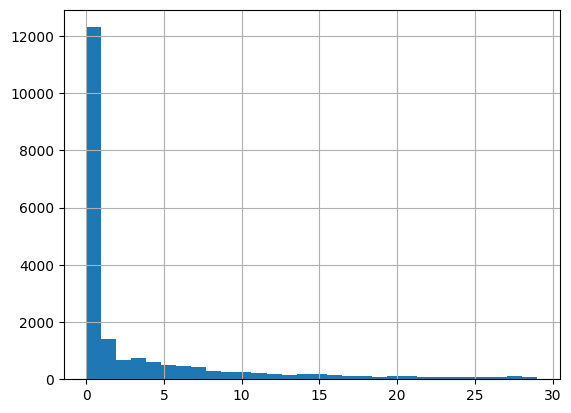

In [17]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 30 else None).hist(bins=30)

<Axes: >

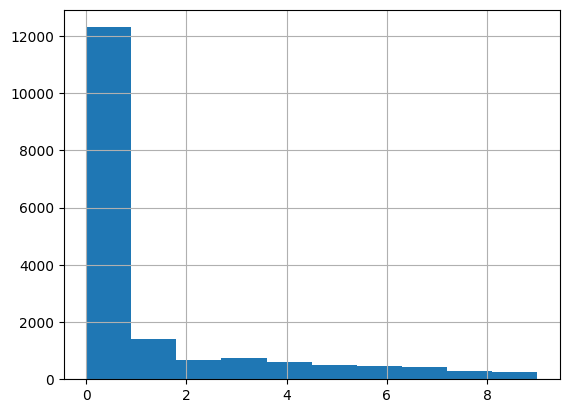

In [18]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=10)

In [19]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range
0.0    12297
1.0     1401
2.0      660
3.0      745
4.0      605
5.0      500
6.0      462
7.0      437
8.0      279
9.0      263
Name: count, dtype: int64

In [20]:
from datetime import timedelta


look_back = 3
measurementRangesDf['delta_days'] = measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: ((look_back - 1) - x)).apply(lambda x: x if x > 0 else 0)
measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)
measurementRangesDf['measurement_datetime_range_updated'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min_updated)
measurementRangesDf

/tmp/ipykernel_234587/38762998.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)


,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range,delta_days,measurement_datetime_min_updated,measurement_datetime_range_updated
0,18849,12790706,2019-09-01,2019-09-03,2 days,0,2019-09-01,2 days
1,41308,14824675,2021-05-31,2021-06-01,1 days,1,2021-05-30,2 days
2,49412,14519127,2021-03-16,2021-04-06,21 days,0,2021-03-16,21 days
3,49412,14824910,2021-05-31,2021-06-01,1 days,1,2021-05-30,2 days
4,49412,14826689,2021-06-01,2021-07-19,48 days,0,2021-06-01,48 days
...,...,...,...,...,...,...,...,...
21699,2680486,17502337,2023-03-15,2023-03-22,7 days,0,2023-03-15,7 days
21700,2681377,17518169,2023-03-19,2023-04-28,40 days,0,2023-03-19,40 days
21701,2682433,17536805,2023-03-24,2023-03-26,2 days,0,2023-03-24,2 days
21702,2684042,17565390,2023-03-31,2023-04-01,1 days,1,2023-03-30,2 days


<Axes: >

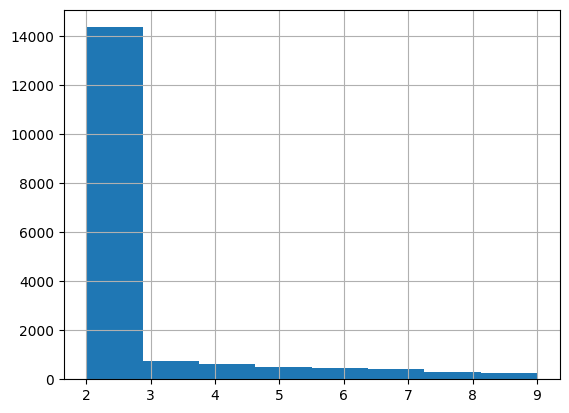

In [21]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=8)

In [22]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range_updated
2.0    14358
3.0      745
4.0      605
5.0      500
6.0      462
7.0      437
8.0      279
9.0      263
Name: count, dtype: int64

In [23]:
from datetime import timedelta


data = []
for i, row in measurementRangesDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime_min_updated', 'measurement_datetime_max']].drop_duplicates().iterrows():
    currentDate = row.measurement_datetime_min_updated
    while (currentDate <= row.measurement_datetime_max):
        data.append([row.PATIENT_ID, row.EPISODE_ID, currentDate])
        currentDate = currentDate + timedelta(days=1)

measurementDatesDf = pd.DataFrame(data, columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'])
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,18849,12790706,2019-09-01
1,18849,12790706,2019-09-02
2,18849,12790706,2019-09-03
3,41308,14824675,2021-05-30
4,41308,14824675,2021-05-31
...,...,...,...
255263,2684042,17565390,2023-03-31
255264,2684042,17565390,2023-04-01
255265,2684042,17565632,2023-03-30
255266,2684042,17565632,2023-03-31


In [24]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()

/tmp/ipykernel_234587/2660346801.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()


np.int64(255268)

In [25]:
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,18849,12790706,2019-09-01
1,18849,12790706,2019-09-02
2,18849,12790706,2019-09-03
3,41308,14824675,2021-05-30
4,41308,14824675,2021-05-31
...,...,...,...
255263,2684042,17565390,2023-03-31
255264,2684042,17565390,2023-04-01
255265,2684042,17565632,2023-03-30
255266,2684042,17565632,2023-03-31


In [36]:
finalDf = measurementDatesDf.merge(
    dataDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,sepsis,Organism_FIRST_NOTED
0,18849,12790706,2019-09-01,63.75,50.0,74.0,74.0,69.0,7.497619,96.5,...,138.0,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286,0.0,2019-09-01
1,18849,12790706,2019-09-02,55.75,48.0,61.0,54.0,48.0,6.020797,88.0,...,105.0,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913,0.0,2019-09-01
2,18849,12790706,2019-09-03,55.00,47.0,69.0,48.0,47.0,10.165300,90.0,...,111.0,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222,0.0,2019-09-01
3,41308,14824675,2021-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,41308,14824675,2021-05-31,59.00,55.0,63.0,55.0,63.0,5.656854,104.0,...,124.0,2.121320,29.900000,29.9,29.9,29.9,29.9,NaN,0.0,2021-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338570,2684042,17565390,2023-04-01,51.40,48.0,53.0,52.0,53.0,1.949359,NaN,...,104.0,4.086563,36.100000,36.0,36.2,36.0,36.1,0.100000,0.0,2023-04-01
338571,2684042,17565632,2023-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
338572,2684042,17565632,2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
338573,2684042,17565632,2023-04-01,52.60,50.0,55.0,52.0,52.0,1.949359,84.0,...,103.0,4.615192,36.480000,36.2,36.8,36.8,36.6,0.268328,0.0,2023-04-01


In [34]:
finalDf.isna().sum()

PATIENT_ID                                 0
EPISODE_ID                                 0
measurement_datetime                       0
Diastolic blood pressure_mean         133167
Diastolic blood pressure_min          133167
Diastolic blood pressure_max          133167
Diastolic blood pressure_first        133167
Diastolic blood pressure_last         133167
Diastolic blood pressure_std          161557
Heart rate_mean                       157508
Heart rate_min                        157508
Heart rate_max                        157508
Heart rate_first                      157508
Heart rate_last                       157508
Heart rate_std                        177600
Mean blood pressure_mean              160505
Mean blood pressure_min               160505
Mean blood pressure_max               160505
Mean blood pressure_first             160505
Mean blood pressure_last              160505
Mean blood pressure_std               189310
Peripheral oxygen saturation_mean     117879
Peripheral

In [37]:
# finalDf = finalDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'concept_name', 'sepsis', 'value_mean', 'value_std', 'value_open', 'value_high', 'value_low', 'value_close']]
# finalDf['concept_name'] = 'Temperature'
finalDf = finalDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': 'first'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
).drop(columns=['sepsis']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'sepsis': 'max'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Diastolic blood pressure_mean,Diastolic blood pressure_min,Diastolic blood pressure_max,Diastolic blood pressure_first,Diastolic blood pressure_last,Diastolic blood pressure_std,Heart rate_mean,...,Systolic blood pressure_last,Systolic blood pressure_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_first,Temperature_last,Temperature_std,Organism_FIRST_NOTED,sepsis
0,18849,12790706,2019-09-01,63.75,50.0,74.0,74.0,69.0,7.497619,96.5,...,138.0,12.199971,37.477778,35.5,40.6,35.5,36.9,1.605286,2019-09-01,0.0
1,18849,12790706,2019-09-02,55.75,48.0,61.0,54.0,48.0,6.020797,88.0,...,105.0,7.788881,36.875000,36.2,38.1,36.8,36.4,0.853913,2019-09-01,0.0
2,18849,12790706,2019-09-03,55.00,47.0,69.0,48.0,47.0,10.165300,90.0,...,111.0,8.341663,36.750000,36.1,37.7,37.7,36.1,0.695222,2019-09-01,0.0
3,41308,14824675,2021-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-31,0.0
4,41308,14824675,2021-05-31,59.00,55.0,63.0,55.0,63.0,5.656854,104.0,...,124.0,2.121320,29.900000,29.9,29.9,29.9,29.9,NaN,2021-05-31,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338570,2684042,17565390,2023-04-01,51.40,48.0,53.0,52.0,53.0,1.949359,NaN,...,104.0,4.086563,36.100000,36.0,36.2,36.0,36.1,0.100000,2023-04-01,0.0
338571,2684042,17565632,2023-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,0.0
338572,2684042,17565632,2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01,0.0
338573,2684042,17565632,2023-04-01,52.60,50.0,55.0,52.0,52.0,1.949359,84.0,...,103.0,4.615192,36.480000,36.2,36.8,36.8,36.6,0.268328,2023-04-01,0.0


In [ ]:
# finalDf["Diastolic blood pressure_min"] = 
finalDf.groupby(['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'sepsis']).transform(lambda x: x.fillna(x.mean()))
# for col in finalDf.columns:
#     print('col: ', col)

In [30]:
finalDf.sepsis.value_counts()/finalDf.shape[0]

sepsis
0.0    0.913453
1.0    0.086547
Name: count, dtype: float64

In [31]:
finalDf = finalDf.merge(
    pd.DataFrame(
        list(finalDf[finalDf.sepsis == 1].apply(lambda x: (x.loc['PATIENT_ID'], x.loc['EPISODE_ID'], x.loc['measurement_datetime'], (1 if (x.loc['measurement_datetime'] >= x.loc['Organism_FIRST_NOTED']) else 0)), axis=1)),
        columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'target']
        ),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
).fillna(0)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,concept_name,value_mean,value_std,value_open,value_high,value_low,value_close,Organism_FIRST_NOTED,sepsis,target
0,18849,12790706,2019-09-01,Temperature,37.477778,1.605286,36.9,40.6,35.5,35.5,2019-09-01,0.0,0.0
1,18849,12790706,2019-09-02,Temperature,36.875000,0.853913,36.4,38.1,36.2,36.8,2019-09-01,0.0,0.0
2,18849,12790706,2019-09-03,Temperature,36.750000,0.695222,36.1,37.7,36.1,37.7,2019-09-01,0.0,0.0
3,41308,14824675,2021-05-29,Temperature,36.576819,0.000000,0.0,0.0,0.0,0.0,2021-05-31,0.0,0.0
4,41308,14824675,2021-05-30,Temperature,36.576819,0.000000,0.0,0.0,0.0,0.0,2021-05-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228981,2684042,17565390,2023-03-31,Temperature,36.576819,0.000000,0.0,0.0,0.0,0.0,2023-04-01,0.0,0.0
228982,2684042,17565390,2023-04-01,Temperature,36.100000,0.089443,36.1,36.2,36.0,36.0,2023-04-01,0.0,0.0
228983,2684042,17565632,2023-03-30,Temperature,36.576819,0.000000,0.0,0.0,0.0,0.0,2023-04-01,0.0,0.0
228984,2684042,17565632,2023-03-31,Temperature,36.576819,0.000000,0.0,0.0,0.0,0.0,2023-04-01,0.0,0.0


In [32]:
finalDf.target.value_counts()/finalDf.shape[0]

target
0.0    0.953316
1.0    0.046684
Name: count, dtype: float64

In [ ]:
import os
from pathlib import Path


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

finalDf.to_csv(Path(dataDirName, 'data_all_variables.csv'), index=False)